In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv
/kaggle/input/unsw-nb15/UNSW-NB15_1.csv
/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv
/kaggle/input/unsw-nb15/UNSW-NB15_LIST_EVENTS.csv
/kaggle/input/unsw-nb15/UNSW-NB15_4.csv
/kaggle/input/unsw-nb15/UNSW-NB15_3.csv
/kaggle/input/unsw-nb15/UNSW-NB15_2.csv
/kaggle/input/unsw-nb15/NUSW-NB15_features.csv


<h1 style="padding: 10px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:180%"><b> Introduction </b></h1>

This notebook focuses on understanding the data structure and conducting exploratory data analysis (EDA) using the UNSW_NB15 dataset for our intrusion detection system (IDS) project. The **UNSW_NB15** dataset contains a rich array of features that are essential for analyzing network traffic and identifying potential security threats.

<h1 style="padding: 10px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:180%"><b> Imports </b></h1>

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import math
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

<h1 style="padding: 10px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:180%"><b> Understanding About Features </b></h1>

In [3]:
# Load the features file
NB15_features = pd.read_csv('/kaggle/input/unsw-nb15/NUSW-NB15_features.csv', encoding='cp1252')

# Dataset structure
NB15_features.info()

# Display the dataframe
NB15_features.head(49)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No.          49 non-null     int64 
 1   Name         49 non-null     object
 2   Type         49 non-null     object
 3   Description  49 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


<h1 style="padding: 10px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:180%"><b> Loading and Concating the Datasets </b></h1>

In [4]:
# Load the datasets
NB15_1 = pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_1.csv')
NB15_2 = pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_2.csv')
NB15_3 = pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_3.csv')
NB15_4 = pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_4.csv')

# Rename the columns of each dataset using the features file
NB15_1.columns = NB15_features['Name'] 
NB15_2.columns = NB15_features['Name'] 
NB15_3.columns = NB15_features['Name'] 
NB15_4.columns = NB15_features['Name'] 

# Concatenate all datasets
train_df = pd.concat([NB15_1, NB15_2, NB15_3, NB15_4], ignore_index=True)

# Shuffle the data points in train_df
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)

/tmp/ipykernel_17/137723431.py:2: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  NB15_1 = pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_1.csv')
/tmp/ipykernel_17/137723431.py:3: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  NB15_2 = pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_2.csv')


<h1 style="padding: 10px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:180%"><b> Understanding the Structure of the Datasets </b></h1>

## 1. Dataset Dimension

In [5]:
# Dimension of Dataset
print("dataset shape: ",train_df.shape)

dataset shape:  (2540043, 49)


## 2. Dataset Structure

In [6]:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540043 entries, 0 to 2540042
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit          

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,175.45.176.3,57672,149.171.126.15,3260,tcp,CON,0.285356,986,86,62,...,,10,8,4,5,3,1,7,NaN,0
1,59.166.0.8,38052,149.171.126.9,6881,tcp,FIN,0.314311,1540,1644,31,...,,14,6,8,12,5,1,6,NaN,0
2,59.166.0.0,42911,149.171.126.2,38558,udp,CON,0.301180,536,304,31,...,0,9,16,7,6,1,1,3,NaN,0
3,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000009,114,0,254,...,,33,33,17,17,17,17,33,Generic,1
4,59.166.0.5,61544,149.171.126.6,53,udp,CON,0.001079,146,178,31,...,,2,2,5,4,1,1,1,NaN,0


## 3. Dataset Columns Type

In [7]:
# Identify the data types of columns
column_data_types = train_df.dtypes

# Initialize counts and lists
numerical_count = 0
categorical_count = 0
categorical_columns = []

# Iterate through column names and data types
for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1
        categorical_columns.append(column_name) 

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

# Print the names of the categorical columns
print("The categorical columns are:", categorical_columns)

There are 40 Numerical Columns in dataset
There are 9 Categorical Columns in dataset
The categorical columns are: ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service', 'ct_ftp_cmd', 'attack_cat']


<h1 style="padding: 10px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:180%"><b> Identifying Data Quality Issues </b></h1>

## 1. Duplicate Records

### a. Check of duplications

In [8]:
print("Duplicates in train_df: ",train_df.duplicated().sum())

Duplicates in train_df:  480626


### b. Delete duplications

In [9]:
train_df = train_df.drop_duplicates()

## 2. Missing Data

### a. Check of missing data

In [10]:
missing_data = train_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(train_df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
Name,,
srcip,0,0.00
sport,0,0.00
dstip,0,0.00
dsport,0,0.00
proto,0,0.00
state,0,0.00
dur,0,0.00
sbytes,0,0.00
dbytes,0,0.00


### b. Handle Missing Data

#### - Handling attack_cat Column
Since the attack_cat column represents the category of the attack, missing values likely imply that there was no attack on those instances. Therefore, it makes sense to replace missing values with "normal" or "not attacked" to indicate benign traffic.

In [11]:
# Replace missing values with 'normal' in the 'attack_cat' column
train_df = train_df.fillna({'attack_cat': 'normal'})

# Standardize text by stripping and converting to lowercase
train_df['attack_cat'] = train_df['attack_cat'].apply(lambda x: x.strip().lower())

#### - Handling ct_flw_http_mthd Column
In this case, the column likely tracks the number of HTTP methods in network flows. Missing values here would imply no HTTP methods were detected for those specific records. Since a count of 0 would appropriately represent the absence of HTTP methods, replacing NaN with 0 is a logical choice.

In [12]:
# Replace missing values with 0 in the 'ct_flw_http_mthd' column
train_df = train_df.fillna({'ct_flw_http_mthd': 0})

#### - Handling is_ftp_login Column
The is_ftp_login column is binary (with values like 1 for login and 0 for no login). Missing values would logically represent that no login occurred, as it wouldn't make sense for a missing value to indicate a successful login.

In [13]:
# Replace missing values with 0 in the 'is_ftp_login' column
train_df = train_df.fillna({'is_ftp_login': 0})

## 3. Class Distribution

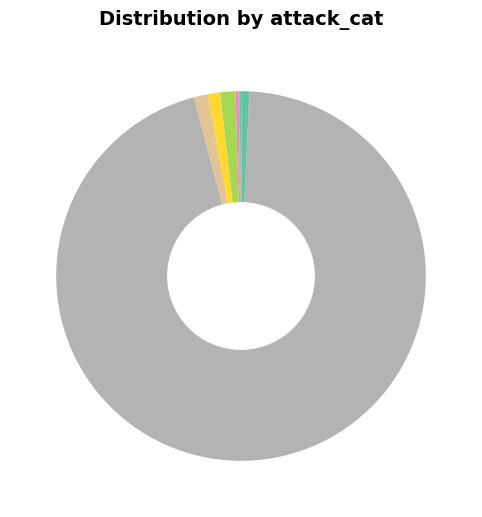

In [14]:
# The column name
col = 'attack_cat'

# Set figure size
plt.figure(figsize=(10, 6))

# Extract value counts for the specified column and sort by index
value_counts = train_df[col].value_counts().sort_index()

# Set the title of the plot
plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)

# Generate colors using a Seaborn palette
colors = sns.color_palette('Set2', len(value_counts))

# Create the pie chart
plt.pie(value_counts.values, labels=None, autopct="", startangle=90, colors=colors)

# Add a white circle in the middle to create a donut chart effect
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.show()

In [15]:
# Print class distribution
print("Before resampling:", train_df['attack_cat'].value_counts())
print()

Before resampling: attack_cat
normal            1959771
exploits            27600
generic             25378
fuzzers             21795
reconnaissance      13357
dos                  5665
analysis             2185
backdoor             1684
shellcode            1511
backdoors             300
worms                 171
Name: count, dtype: int64



## 4. Outliers

### a. Visualize the distribution of selected numerical columns in the dataset

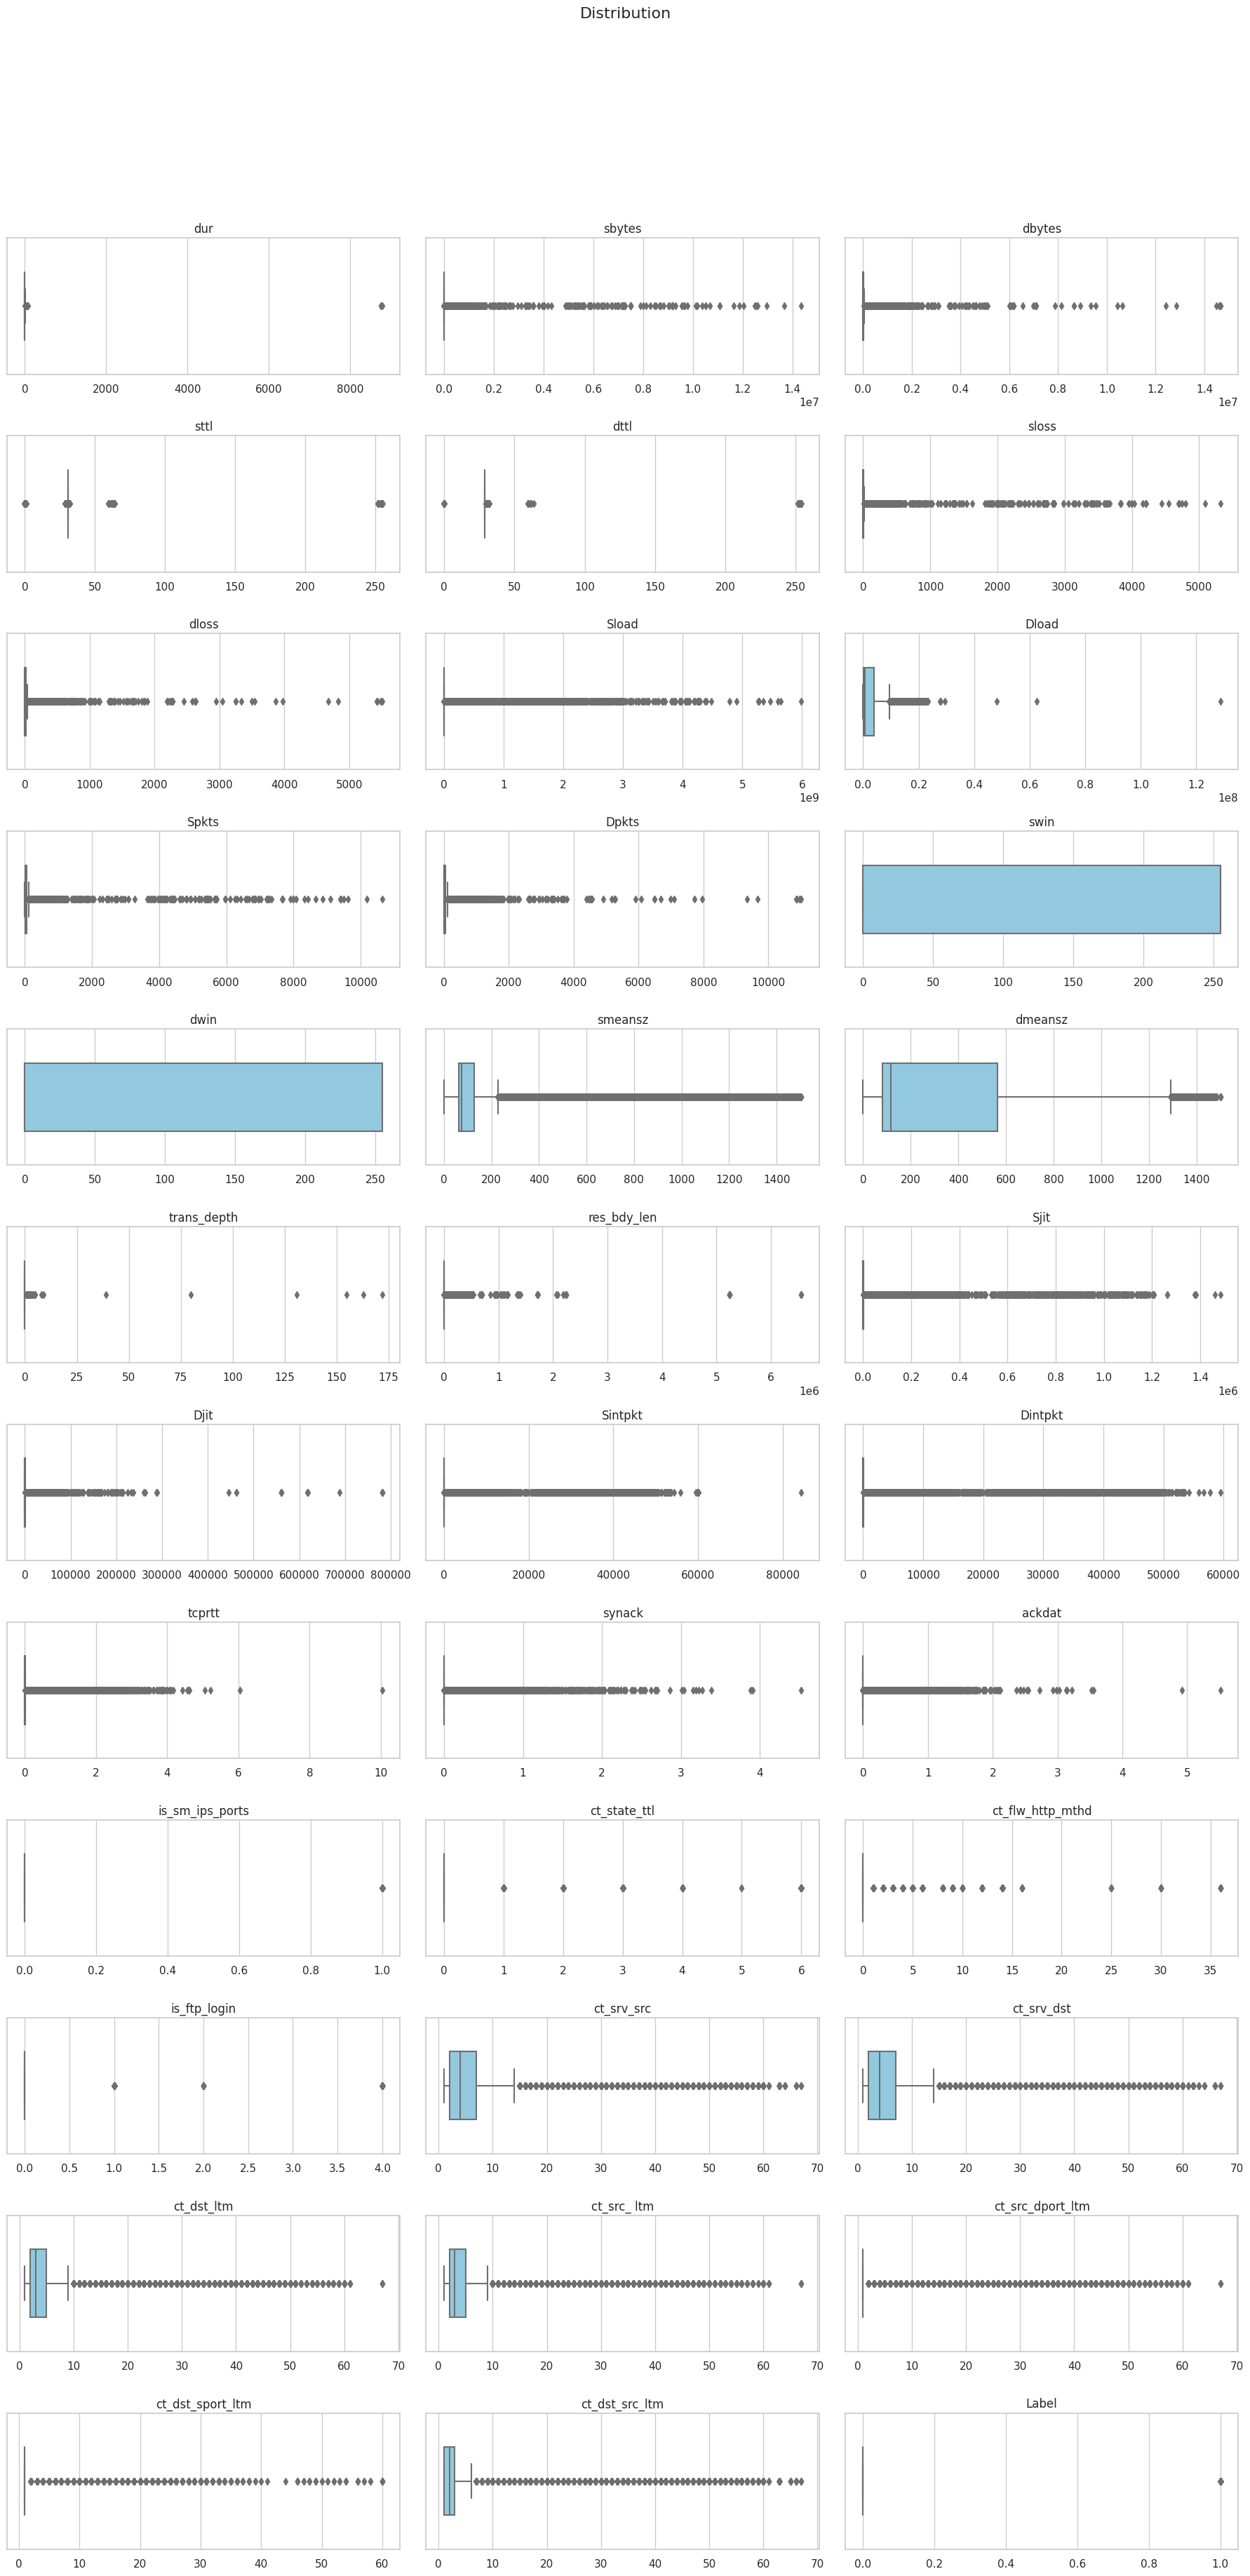

In [16]:
# Extract numerical columns
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Columns to exclude
exclude_columns = ['sport', 'swim', 'dwim', 'stcpb', 'dtcpb', 'Stime', 'Ltime']

# Filter out the columns to exclude
numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

# Number of numerical columns
num_columns = len(numerical_columns)

# Calculate the number of rows and columns needed for the subplots
num_cols = 3  # Fixed number of columns
num_rows = math.ceil(num_columns / num_cols)  # Calculate rows needed

plt.figure(figsize=(18, num_rows * 3))

sns.set_palette("husl")
sns.set(style="whitegrid")

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=train_df[col], color='skyblue', width=0.5)    
    plt.title(col)
    plt.xlabel("")

plt.suptitle("Distribution", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### b. Handling Outliers in the Data
Perform outlier treatment by replacing values outside the 1.5 IQR range with the column median. This ensures a cleaner dataset for further analysis or modeling.

In [17]:
# Handle outliers in each numerical column
for col in numerical_columns:
    median_value = train_df[col].median()
    lower_bound = train_df[col].quantile(0.25) - 1.5 * (train_df[col].quantile(0.75) - train_df[col].quantile(0.25))
    upper_bound = train_df[col].quantile(0.75) + 1.5 * (train_df[col].quantile(0.75) - train_df[col].quantile(0.25))
    train_df[col] = train_df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

## 5. Checking Unique Values of Attributes and Data Type

### a. Unique Value Analysis for Columns

In [18]:
# Get the column names from the DataFrame
cols = train_df.columns

# Print a header for clarity
print("Unique Value Analysis for DataFrame Columns")
print("=" * 80)

# Loop through each column and print its unique values and related information
for column in cols:
    unique_values = train_df[column].unique()
    num_unique = train_df[column].nunique()
    dtype = train_df[column].dtype

    # Formatted output for each column
    print(f"Column: '{column}'")
    print(f" - Data Type: {dtype}")
    print(f" - Total Unique Values: {num_unique}")
    print(f" - Unique Values: {unique_values}")
    print("-" * 80)

Unique Value Analysis for DataFrame Columns
Column: 'srcip'
 - Data Type: object
 - Total Unique Values: 43
 - Unique Values: ['175.45.176.3' '59.166.0.8' '59.166.0.0' '175.45.176.1' '59.166.0.5'
 '59.166.0.7' '175.45.176.0' '149.171.126.14' '59.166.0.1' '59.166.0.9'
 '149.171.126.15' '149.171.126.18' '59.166.0.4' '59.166.0.2' '59.166.0.3'
 '59.166.0.6' '175.45.176.2' '149.171.126.10' '10.40.182.1'
 '149.171.126.12' '10.40.170.2' '10.40.85.30' '149.171.126.2'
 '10.40.182.3' '10.40.85.1' '10.40.182.6' '10.40.85.10' '149.171.126.7'
 '149.171.126.6' '149.171.126.0' '149.171.126.8' '149.171.126.13'
 '149.171.126.5' '192.168.241.243' '149.171.126.4' '149.171.126.9'
 '149.171.126.1' '149.171.126.3' '149.171.126.11' '149.171.126.19'
 '149.171.126.17' '149.171.126.16' '127.0.0.1']
--------------------------------------------------------------------------------
Column: 'sport'
 - Data Type: object
 - Total Unique Values: 100343
 - Unique Values: [57672 38052 42911 ... '17953' '20349' '53235']
-

- Observed that some values are repeated due to their wrong format , for example in column 'ct_ftp_cmd' the unique values are [0 ' ' '1' 1 '0' 2 8 '2' 4 5 3 6 '4'] in which we see that same values reapeated and treated as differently
- In column 'is_ftp_login' unique values are [0. 1. 2. 4.] which is not correct because according to given NB15_features.csv this column is a binary column

### b. Handling `ct_ftp_cmd`

In [19]:
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].astype('str')
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].replace(' ', '0')
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].astype('int')

### c. Handling `is_ftp_login`

In [20]:
train_df['is_ftp_login'] = (train_df[column] > 0).astype(int)

<h1 style="padding: 10px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:180%"><b> Analysing Feature Distributions </b></h1>

## 1. Calculate skewness for each numeric feature

In [21]:
skewness_values = train_df[numerical_columns].skew()

# Convert to DataFrame for better visualization
skewness_df = pd.DataFrame(skewness_values, columns=['Skewness'])

# Display the skewness table
skewness_df

,Skewness
Name,
dur,2.906781
sbytes,1.260352
dbytes,1.822295
sttl,0.000000
dttl,0.000000
sloss,0.504857
dloss,1.310600
Sload,1.242573
Dload,2.183785


## 2. Handle skewness in the distribution of numerical features
- |Skewness| < 1: The distribution is approximately symmetric.
- |Skewness| > 1: The distribution is highly skewed.
- |Skewness| between 1 and 2: Moderately skewed distribution.

In [22]:
def transform(X):
    eps = 1e-5
    numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    for col in numerical_columns:
        skewness = skew(X[col])
        if skewness > 0:  # Positive skew
            X[col] = np.log(X[col] + eps)
        elif skewness < 0:  # Negative skew
            X[col] = np.log(np.max(X[col] + eps) - X[col] + eps)
        else:  # Symmetric or zero skew
            X[col] = X[col]  # No transformation needed
            
    return X
transform(train_df)

/tmp/ipykernel_17/850694305.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(X[col])


Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,175.45.176.3,57672,149.171.126.15,3260,tcp,CON,-1.253983,6.893656,4.454347,31.0,...,-11.512925,2.302586,2.079443,1.386297,1.609440,1.0,1.0,0.693152,normal,0.0
1,59.166.0.8,38052,149.171.126.9,6881,tcp,FIN,-1.157341,7.339538,7.404888,31.0,...,-11.512925,2.639058,1.791761,2.079443,1.098616,1.0,1.0,1.791761,normal,0.0
2,59.166.0.0,42911,149.171.126.2,38558,udp,CON,-1.200014,6.284134,5.717028,31.0,...,-11.512925,2.197226,1.386297,1.945912,1.791761,1.0,1.0,1.098616,normal,0.0
3,175.45.176.1,47439,149.171.126.14,53,udp,INT,-10.871072,4.736199,-11.512925,31.0,...,-11.512925,1.386297,1.386297,1.098616,1.098616,1.0,1.0,0.693152,generic,0.0
4,59.166.0.5,61544,149.171.126.6,53,udp,CON,-6.822495,4.983607,5.181784,31.0,...,-11.512925,0.693152,0.693152,1.609440,1.386297,1.0,1.0,0.000010,normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540035,59.166.0.2,29290,149.171.126.9,143,tcp,FIN,-3.445776,8.964440,9.619798,31.0,...,-11.512925,1.609440,1.791761,0.000010,1.386297,1.0,1.0,0.000010,normal,0.0
2540037,59.166.0.0,18378,149.171.126.0,17406,udp,CON,-3.347932,6.269096,5.717028,31.0,...,-11.512925,2.397896,1.386297,1.098616,1.945912,1.0,1.0,0.000010,normal,0.0
2540038,59.166.0.8,34415,149.171.126.0,5190,tcp,FIN,-4.812317,7.560080,8.369157,31.0,...,-11.512925,1.098616,2.302586,1.386297,0.000010,1.0,1.0,0.000010,normal,0.0
2540039,59.166.0.8,56352,149.171.126.2,53,udp,CON,-6.852321,4.867535,5.087596,31.0,...,-11.512925,0.000010,0.000010,0.693152,1.791761,1.0,1.0,0.000010,normal,0.0


<h1 style="padding: 10px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:180%"><b> Featutre Engineering </b></h1>

## 1. Create new feature


### 1. **Ratios**

Ratios are important in network traffic analysis as they provide insights into the relative relationship between different metrics. 

- **Byte Ratio (`byte_ratio`)**: This feature helps to understand the proportion of bytes sent versus bytes received. A higher byte ratio may indicate a data-heavy transmission, which could be suspicious in certain contexts (like a DDoS attack).
  
- **Packet Ratio (`pkt_ratio`)**: The ratio of packets sent to packets received can indicate whether there is an abnormal amount of traffic being generated by a source, which could signify an attack.

- **Load Ratios (`load_ratio`)**: This shows the relationship between the load sent and load received. A skewed load ratio may indicate unusual traffic patterns or potential data exfiltration.

- **Jitter Ratio (`jit_ratio`)**: This metric assesses the variability in packet arrival times. High jitter might suggest an attack or network issue, such as packet loss.

- **Inter-Packet Ratio (`inter_pkt_ratio`)**: This feature can indicate the time between packets sent and received. A consistent pattern is expected in regular traffic, while irregular intervals might signal malicious activity.

- **TCP Setup Ratio (`tcp_setup_ratio`)**: Analyzing the TCP connection setup can help identify issues such as SYN flooding attacks or improper connection handling.

### 2. **Aggregate Features**

Aggregate features summarize multiple metrics into single values, providing a high-level overview of the traffic behavior.

- **Total Bytes, Packets, Load, Jitter, Inter-Packet Times, and TCP Setup**: These aggregate metrics are essential for understanding the overall volume and behavior of the network traffic. They can indicate whether traffic is normal or abnormal, allowing models to detect patterns associated with attacks.

### 3. **Interaction Features**

Interaction features capture relationships between different metrics, which can be critical in understanding complex behaviors.

- **Byte-Packet Interaction**: These features (e.g., `byte_pkt_interaction_src`, `byte_pkt_interaction_dst`) help understand the relationship between the amount of data sent and the number of packets. A high interaction might signify inefficient usage of the network, which could be indicative of certain types of attacks.

- **Load-Jitter Interaction**: This metric reflects the relationship between load and jitter, helping to identify potential performance issues that may arise under specific attack patterns.

### 4. **Statistical Features**

Statistical features provide insights into the distribution and differences in traffic metrics.

- **Mean Packet Size (`mean_pkt_size`)**: By calculating the mean packet size for both source and destination, this feature helps identify anomalies in packet sizes that may arise during attacks.

- **TCP Sequence Difference (`tcp_seq_diff`)**: Analyzing the difference between TCP sequence numbers can help detect TCP hijor intrusion detection on the UNSW_NB15 dataset.

In [23]:
def generate_features(df):
    # Duration
    df['duration'] = df['Ltime'] - df['Stime']
    
    # Ratios
    df['byte_ratio'] = df['sbytes'] / (df['dbytes'] + 1)
    df['pkt_ratio'] = df['Spkts'] / (df['Dpkts'] + 1)
    df['load_ratio'] = df['Sload'] / (df['Dload'] + 1)
    df['jit_ratio'] = df['Sjit'] / (df['Djit'] + 1)
    df['inter_pkt_ratio'] = df['Sintpkt'] / (df['Dintpkt'] + 1)
    df['tcp_setup_ratio'] = df['tcprtt'] / (df['synack'] + df['ackdat'] + 1)
    
    # Aggregate Features
    df['total_bytes'] = df['sbytes'] + df['dbytes']
    df['total_pkts'] = df['Spkts'] + df['Dpkts']
    df['total_load'] = df['Sload'] + df['Dload']
    df['total_jitter'] = df['Sjit'] + df['Djit']
    df['total_inter_pkt'] = df['Sintpkt'] + df['Dintpkt']
    df['total_tcp_setup'] = df['tcprtt'] + df['synack'] + df['ackdat']
    
    # Interaction Features
    df['byte_pkt_interaction_src'] = df['sbytes'] * df['Spkts']
    df['byte_pkt_interaction_dst'] = df['dbytes'] * df['Dpkts']
    df['load_jit_interaction_src'] = df['Sload'] * df['Sjit']
    df['load_jit_interaction_dst'] = df['Dload'] * df['Djit']
    df['pkt_jit_interaction_src'] = df['Spkts'] * df['Sjit']
    df['pkt_jit_interaction_dst'] = df['Dpkts'] * df['Djit']
    
    # Statistical Features
    df['mean_pkt_size'] = df['smeansz'] + df['dmeansz']
    df['tcp_seq_diff'] = df['stcpb'] - df['dtcpb']
    
    return df

generate_features(train_df)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,total_inter_pkt,total_tcp_setup,byte_pkt_interaction_src,byte_pkt_interaction_dst,load_jit_interaction_src,load_jit_interaction_dst,pkt_jit_interaction_src,pkt_jit_interaction_dst,mean_pkt_size,tcp_seq_diff
0,175.45.176.3,57672,149.171.126.15,3260,tcp,CON,-1.253983,6.893656,4.454347,31.0,...,-6.491529,-22.025974,12.351786,3.087541,34.626227,-81.680285,6.176276,-7.980209,8.861067,-1.631169
1,59.166.0.8,38052,149.171.126.9,6881,tcp,FIN,-1.157341,7.339538,7.404888,31.0,...,5.956542,-21.870126,20.349524,21.402882,76.042718,37.664625,20.056650,10.285052,9.075208,-1.375671
2,59.166.0.0,42911,149.171.126.2,38558,udp,CON,-1.200014,6.284134,5.717028,31.0,...,-0.635541,-20.736496,8.711675,7.925498,44.167925,41.946919,6.600932,6.677229,9.228573,0.000000
3,175.45.176.1,47439,149.171.126.14,53,udp,INT,-10.871072,4.736199,-11.512925,31.0,...,-16.222346,-20.736496,3.282906,132.547453,-151.978620,132.547453,-7.980209,132.547453,-7.469874,0.000000
4,59.166.0.5,61544,149.171.126.6,53,udp,CON,-6.822495,4.983607,5.181784,31.0,...,-9.669838,-20.736496,3.454398,3.591765,-151.989286,-154.270881,-7.980209,-7.980209,8.779096,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540035,59.166.0.2,29290,149.171.126.9,143,tcp,FIN,-3.445776,8.964440,9.619798,31.0,...,-2.632534,-22.106727,24.854710,27.804796,41.080716,40.589143,7.865067,7.750193,8.946375,-0.920964
2540037,59.166.0.0,18378,149.171.126.0,17406,udp,CON,-3.347932,6.269096,5.717028,31.0,...,3.937656,-20.736496,8.690829,7.925498,25.576204,25.914187,3.107721,3.308902,9.213535,0.000000
2540038,59.166.0.8,34415,149.171.126.0,5190,tcp,FIN,-4.812317,7.560080,8.369157,31.0,...,-2.106947,-22.115305,23.368533,26.597635,45.943479,46.375224,9.857446,9.683667,9.658865,-0.705580
2540039,59.166.0.8,56352,149.171.126.2,53,udp,CON,-6.852321,4.867535,5.087596,31.0,...,-9.669838,-20.736496,3.373942,3.526479,-150.999560,-153.533115,-7.980209,-7.980209,8.568837,0.000000


## 2. Drop non-numeric columns

After generating the new features, the next step is to drop all non-numeric columns except for the `attack_cat` column, which contains the attack category labels. 

**1. Dropping Non-Numeric Columns:**
- Most machine learning algorithms (like Random Forest, SVM, or XGBoost) expect numeric input. Non-numeric columns (e.g., IP addresses, protocol names) are often not directly useful unless they are encoded into numeric format.
- Features like IP addresses, ports, or service names can lead to overfitting since they are highly specific and not generalized enough to capture network patterns across different environments.
     
**2. Keeping `attack_cat`:**
- The column `attack_cat` contains the labels for the type of network traffic (normal or various attack categories). This is essential for supervised learning tasks, as it’s the target variable the model will use to differentiate between benign and malicious traffic.

In [24]:
# Drop the specified columns 
columns_to_drop = ['sport', 'dsport', 'proto','srcip', 'dstip','state', 'service']
train_df.drop(columns=columns_to_drop, inplace=True)

**3. Simplifies Multiclass Classification:** 
- By converting attack categories to numeric values, the attack_cat column becomes a target variable for multiclass classification, where each unique integer corresponds to a different attack category. The model can now be trained to predict these integers, which correspond to attack types.

In [25]:
label_encoder = LabelEncoder()
ohe = OneHotEncoder()
train_df['attack_cat'] = label_encoder.fit_transform(train_df['attack_cat'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)

Label Mapping:
{'analysis': 0, 'backdoor': 1, 'backdoors': 2, 'dos': 3, 'exploits': 4, 'fuzzers': 5, 'generic': 6, 'normal': 7, 'reconnaissance': 8, 'shellcode': 9, 'worms': 10}


In [26]:
#Checking the categorical columns 
cat_columns = train_df.select_dtypes(include=['O']).columns.tolist()
cat_columns

[]

<h1 style="padding: 10px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:180%"><b> Correlation and Dimensionality Reduction </b></h1>

## 1. Checking Highly Correlated Features

In [27]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 85
high_correlation_mask = correlation_matrix >= 0.8

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Create a DataFrame to display the highly correlated features in a table
correlation_table = pd.DataFrame(highly_correlated_features, columns=['Feature 1', 'Feature 2'])

# Display the table
print("Highly correlated features in table format:")
print(correlation_table.head(40))

Highly correlated features in table format:
   Feature 1                 Feature 2
0        dur                   Dintpkt
1        dur                 pkt_ratio
2        dur           total_inter_pkt
3     sbytes                     sloss
4     sbytes                     dloss
5     sbytes                     Spkts
6     sbytes                     stcpb
7     sbytes                     dtcpb
8     sbytes                      Djit
9     sbytes  byte_pkt_interaction_src
10    dbytes                     Dload
11    dbytes                     Dpkts
12    dbytes                   dmeansz
13    dbytes                 pkt_ratio
14    dbytes                load_ratio
15    dbytes               total_bytes
16    dbytes                total_pkts
17    dbytes             mean_pkt_size
18     sloss                     dloss
19     sloss                     Spkts
20     sloss                     stcpb
21     sloss                     dtcpb
22     sloss                      Djit
23     sloss        

## 2. Drop the features with a correlation coefficient greater than or equal to 80

In [28]:
for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Create a set of features to drop
features_to_drop = set()

# Iterate over the highly correlated features and add one of each pair to the drop list
for feature1, feature2 in highly_correlated_features:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)  # Drop feature2 (you can also choose to drop feature1 instead)

# Print the features to be deleted
print("Deleted features:")
print(features_to_drop)

# Drop the features from the DataFrame
train_df = train_df.drop(columns=features_to_drop)

# Print the remaining features
print("Remaining features after dropping highly correlated ones:")
print(train_df.columns)


Deleted features:
{'Dpkts', 'pkt_ratio', 'dmeansz', 'total_inter_pkt', 'Dintpkt', 'Sintpkt', 'load_jit_interaction_src', 'total_bytes', 'total_pkts', 'byte_pkt_interaction_src', 'Djit', 'sloss', 'Spkts', 'pkt_jit_interaction_src', 'stcpb', 'mean_pkt_size', 'Dload', 'load_ratio', 'Ltime', 'dtcpb', 'dwin', 'synack', 'ackdat', 'total_jitter', 'total_tcp_setup', 'dloss', 'pkt_jit_interaction_dst'}
Remaining features after dropping highly correlated ones:
Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'Sload', 'swin', 'smeansz',
       'trans_depth', 'res_bdy_len', 'Sjit', 'Stime', 'tcprtt',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label', 'duration', 'byte_ratio', 'jit_ratio', 'inter_pkt_ratio',
       'tcp_setup_ratio', 'total_load', 'byte_pkt_interaction_dst',
       'load_jit_interacti

<h1 style="padding: 10px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:180%"><b> Applying SMOTE to balance the unbalanced data </b></h1>

In [29]:
x = train_df.drop(['attack_cat'], axis=1)
y = train_df[['attack_cat']]

# Define the desired number of samples for each class
desired_count = 15000

# Define the oversampling strategy for SMOTE
oversample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] < desired_count}

# Define the undersampling strategy for RandomUnderSampler
undersample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] > desired_count}

# Create the SMOTE and RandomUnderSampler objects
smote = SMOTE(sampling_strategy=oversample_strategy)
undersample = RandomUnderSampler(sampling_strategy=undersample_strategy)

# Combine SMOTE and RandomUnderSampler in a pipeline
pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])

# Print class distribution before resampling
print("Before resampling:", y.value_counts())
print()

# Apply the pipeline to resample the dataset
x_resampled, y_resampled = pipeline.fit_resample(x, y)

# Print class distribution after resampling
print("After resampling:", y_resampled.value_counts())

Before resampling: attack_cat
7             1959771
4               27600
6               25378
5               21795
8               13357
3                5665
0                2185
1                1684
9                1511
2                 300
10                171
Name: count, dtype: int64

After resampling: attack_cat
0             15000
1             15000
2             15000
3             15000
4             15000
5             15000
6             15000
7             15000
8             15000
9             15000
10            15000
Name: count, dtype: int64


<h1 style="padding: 10px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:180%"><b> Checking Feature Importance </b></h1>

## 1. Calculate Feature Importance Score

In [30]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler, StandardScaler

x = x_resampled
y = y_resampled

discrete_features = x.dtypes == int

def mi_score_maker(x,y,discrete_features):
    scores = mutual_info_regression(x,y,discrete_features=discrete_features)
    df = pd.DataFrame({
        'Features':x.columns,
        'Scores':scores
    })
    df = df.sort_values(['Scores'],ascending=False).reset_index(drop=True)
    return df

mi_scores = mi_score_maker(x,y.astype('float64'),discrete_features)

mi_scores

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Features,Scores
0,byte_ratio,1.348832
1,sbytes,1.309769
2,smeansz,1.060107
3,byte_pkt_interaction_dst,0.754821
4,dbytes,0.737821
5,duration,0.671166
6,Stime,0.599935
7,inter_pkt_ratio,0.560856
8,dur,0.515481
9,total_load,0.512969


## 2. Drop features with scores less than 0.001285

In [31]:
# Filter features with scores less than 0.001285
low_score_features = mi_scores[mi_scores['Scores'] < 0.01]

# Extract the feature names
low_score_feature_names = low_score_features['Features'].tolist()

x.drop(low_score_feature_names,axis=1, inplace = True)

# Print the list of low score feature names
low_score_feature_names

['ct_ftp_cmd',
 'is_ftp_login',
 'Label',
 'ct_src_dport_ltm',
 'is_sm_ips_ports',
 'ct_dst_sport_ltm',
 'ct_flw_http_mthd',
 'res_bdy_len',
 'sttl',
 'dttl',
 'ct_state_ttl',
 'trans_depth']

<h1 style="padding: 10px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:180%"><b> Normalisation and Standardization </b></h1>

In [32]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

<h1 style="padding: 10px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:180%"><b>  Checking Variance captured by features </b></h1>

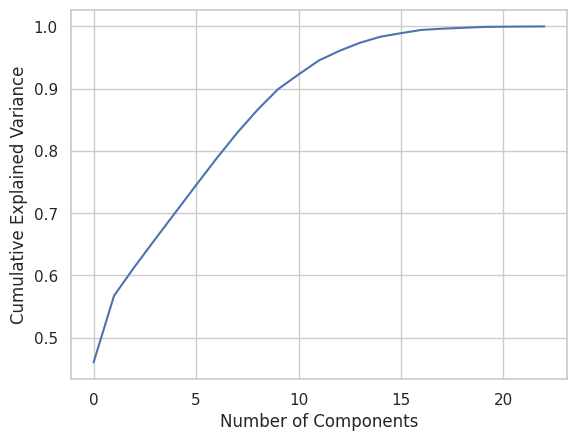

In [33]:
pca = PCA()
pca.fit(x_scaled)  # x_train is your training data
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

**No need to apply pca as all thw features are capturing full variance**

<h1 style="padding: 10px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:180%"><b>  Checking Final Data sctructure </b></h1>

In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165000 entries, 830 to 2139543
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   dur                       165000 non-null  float64
 1   sbytes                    165000 non-null  float64
 2   dbytes                    165000 non-null  float64
 3   Sload                     165000 non-null  float64
 4   swin                      165000 non-null  float64
 5   smeansz                   165000 non-null  float64
 6   Sjit                      165000 non-null  float64
 7   Stime                     165000 non-null  float64
 8   tcprtt                    165000 non-null  float64
 9   ct_srv_src                165000 non-null  float64
 10  ct_srv_dst                165000 non-null  float64
 11  ct_dst_ltm                165000 non-null  float64
 12  ct_src_ ltm               165000 non-null  float64
 13  ct_dst_src_ltm            165000 non-null  flo

<h1 style="padding: 10px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:180%"><b> Saving Processed Dataset as csv File </b></h1>

## 1. Dataset 

In [35]:
# Combine X and y into a single DataFrame
processed_df = pd.concat([x_resampled, y_resampled], axis=1)

# Save the processed DataFrame as a CSV file
processed_df.to_csv('/kaggle/working/processed_unsw_nb15.csv', index=False)

print("Processed dataset has been saved as 'processed_unsw_nb15.csv'")

Processed dataset has been saved as 'processed_unsw_nb15.csv'


In [36]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165000 entries, 830 to 2139543
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   dur                       165000 non-null  float64
 1   sbytes                    165000 non-null  float64
 2   dbytes                    165000 non-null  float64
 3   Sload                     165000 non-null  float64
 4   swin                      165000 non-null  float64
 5   smeansz                   165000 non-null  float64
 6   Sjit                      165000 non-null  float64
 7   Stime                     165000 non-null  float64
 8   tcprtt                    165000 non-null  float64
 9   ct_srv_src                165000 non-null  float64
 10  ct_srv_dst                165000 non-null  float64
 11  ct_dst_ltm                165000 non-null  float64
 12  ct_src_ ltm               165000 non-null  float64
 13  ct_dst_src_ltm            165000 non-null  flo

## 2. NUSW-NB15 features 

In [37]:
column_descriptions = {
    'dur': 'Flow duration', 
    'sbytes': 'Source-to-destination bytes', 
    'dbytes': 'Destination-to-source bytes', 
    'Sload': 'Source-to-destination load',
    'swin': 'Source TCP window size',
    'smeansz': 'Source packet size mean',
    'Sjit': 'Source jitter (msec)',
    'Stime': 'Source packet inter-arrival time',
    'tcprtt': 'TCP round trip time',
    'ct_srv_src': 'Connection count per service from source',
    'ct_srv_dst': 'Connection count per service to destination',
    'ct_dst_ltm': 'Connection count to destination (last time)',
    'ct_src_ltm': 'Connection count from source (last time)', 
    'ct_dst_src_ltm': 'Connection count between source and destination (last time)',
    'duration': 'Duration of the session',
    'byte_ratio': 'Ratio of bytes between source and destination',
    'jit_ratio': 'Ratio of jitter between source and destination',
    'inter_pkt_ratio': 'Ratio of inter-packet arrival times between source and destination',
    'tcp_setup_ratio': 'Ratio of successful TCP setups between source and destination',
    'total_load': 'Total load in the flow',
    'byte_pkt_interaction_dst': 'Interaction of bytes and packets at the destination',
    'load_jit_interaction_dst': 'Interaction of load and jitter at the destination',
    'tcp_seq_diff': 'Difference between TCP sequence numbers',
    'attack_cat': 'The attack type'
}

# Convert the dictionary into a DataFrame
new_features_df = pd.DataFrame(list(column_descriptions.items()), columns=['Name', 'Description'])

# Save the updated features file as CSV in the working directory
new_features_df.to_csv('/kaggle/working/NUSW-NB15_features.csv', index=False)

print("Updated NUSW-NB15_features.csv saved successfully!")

Updated NUSW-NB15_features.csv saved successfully!
